In [22]:
import joblib
import numpy as np
import pandas as pd
import gc
import time
import os
import sys
from contextlib import contextmanager
from lightgbm import LGBMClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization
from skopt import BayesSearchCV 
# from optbinning import OptimalBinning
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm.auto import tqdm
import random
import itertools
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [23]:
pd.set_option('display.max_rows', 500)

In [24]:
# read data
train = pd.read_csv('/kaggle/input/dacon001/open/train.csv')
test = pd.read_csv('/kaggle/input/dacon001/open/test.csv')
sample_submission = pd.read_csv('/kaggle/input/dacon001/open/sample_submission.csv')
original_columns = test.columns.tolist()

In [25]:
# test데이터셋에 있는 변수만 선택 
train = train[test.columns.to_list()+['Y_LABEL','SAMPLE_TRANSFER_DAY']].copy()

In [26]:
cat_features  = ['YEAR','COMPONENT_ARBITRARY']
num_features13 = ['AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI',  'TI', 'V', 'V40', 'ZN']
num_features3 = ['ANONYMOUS_1', 'ANONYMOUS_2','PQINDEX'] 
all_num_features = num_features13 + num_features3

In [27]:
타겟과음의상관관계 = ['ZN','H2O'] # 타겟과 마이너스 상관관계

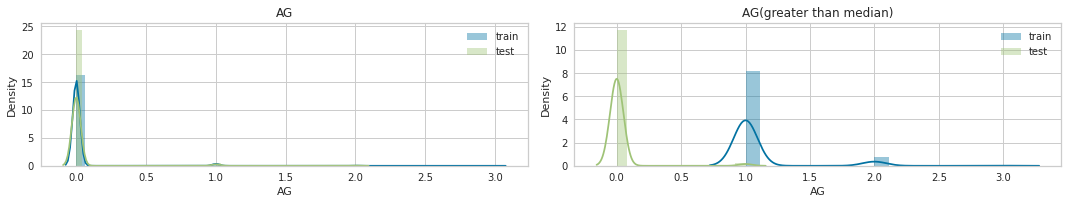

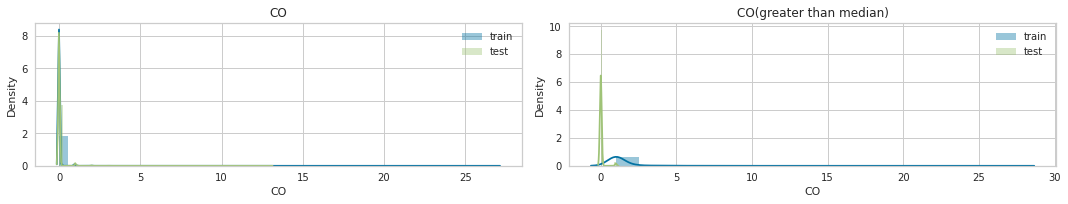

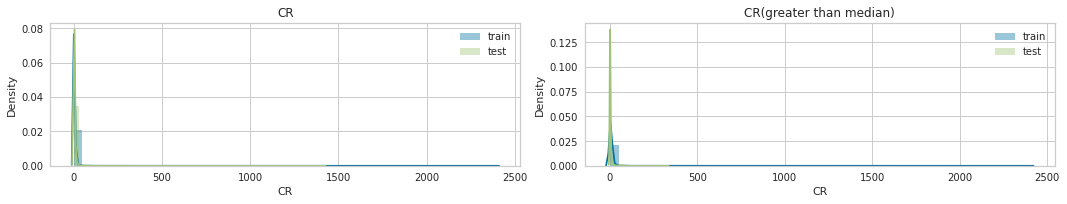

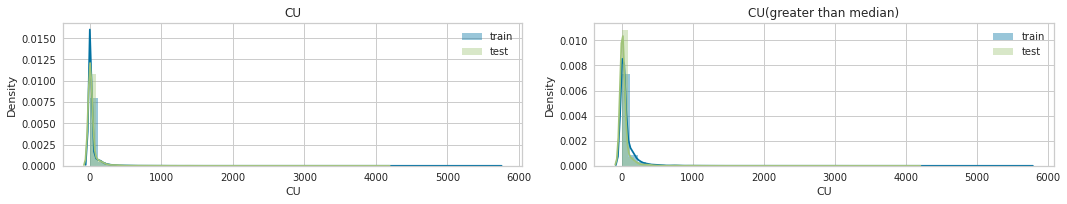

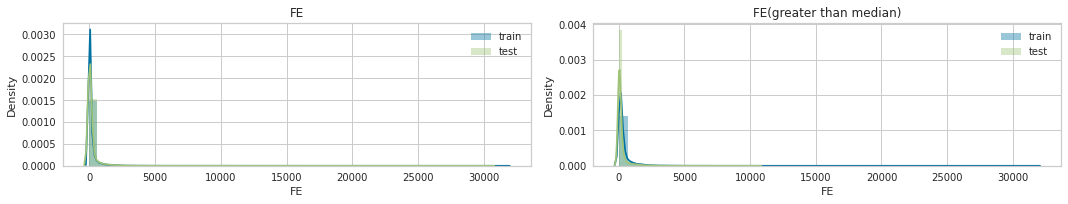

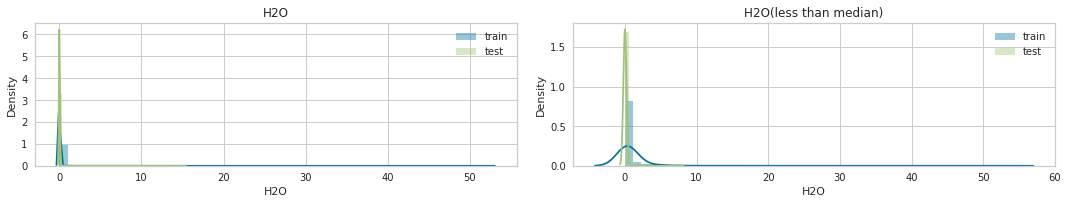

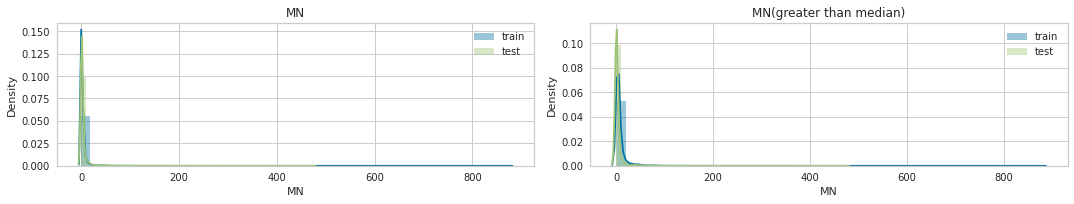

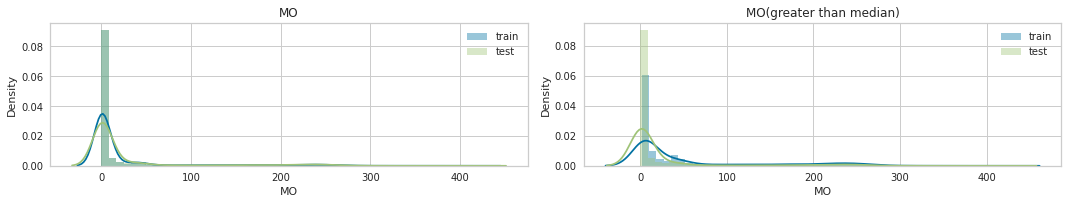

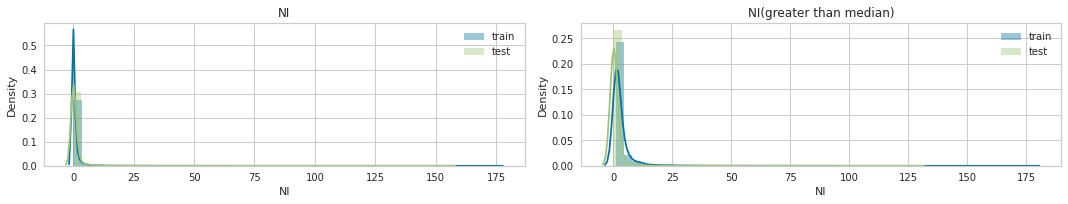

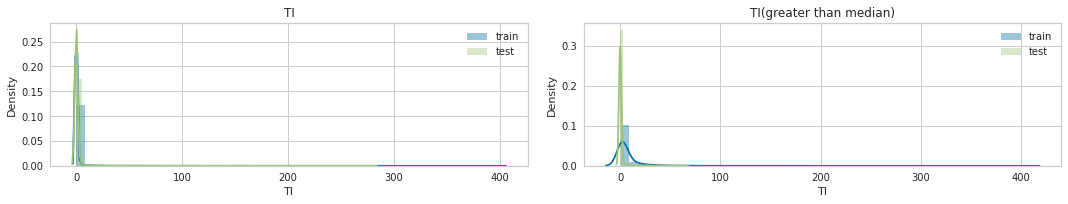

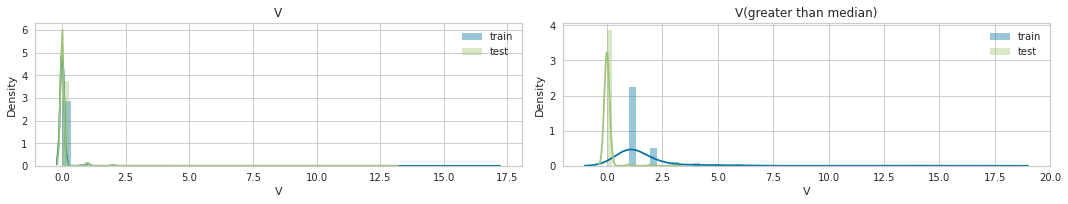

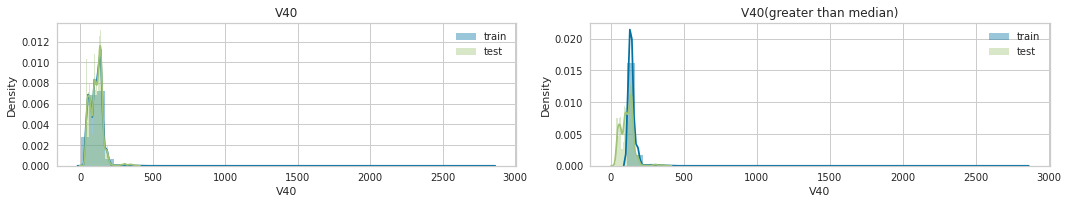

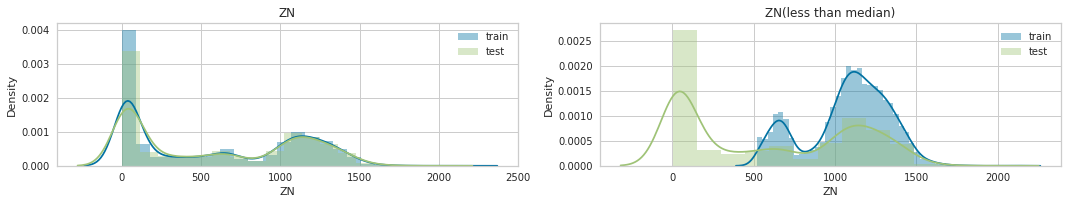

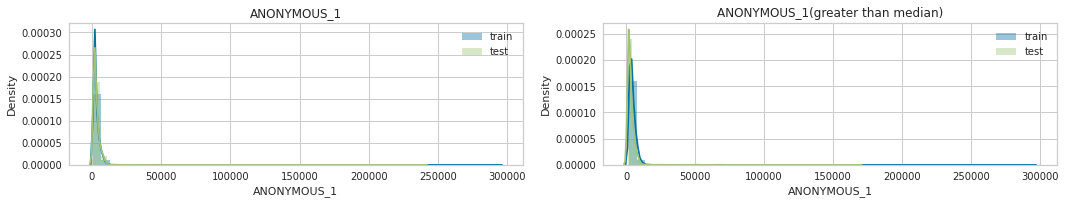

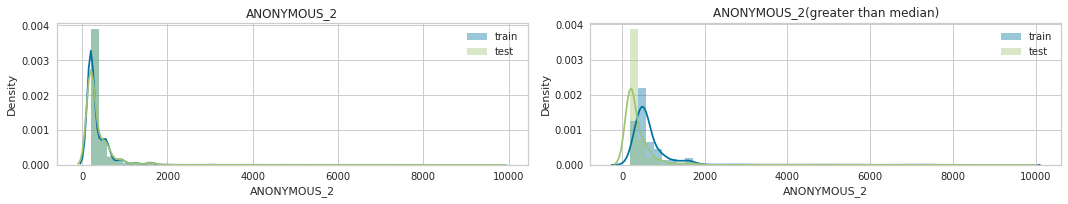

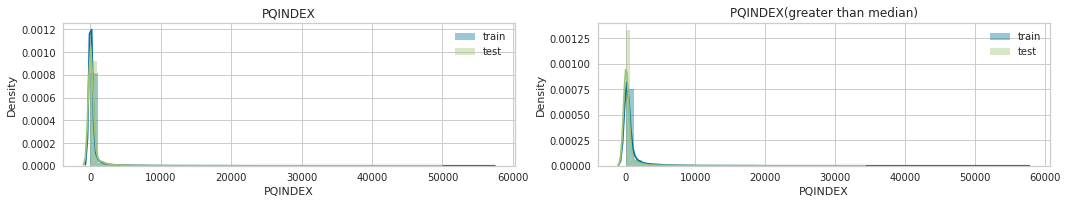

In [29]:
for col in all_num_features:
    
    train_col_max = train[col].max()
    test.loc[test[col]>train_col_max,col] = train_col_max
    
    train_col_med = train[col].median()

    fig,((ax1, ax2)) = plt.subplots(1,2, figsize = (15,3))
    sns.distplot(train[col], label='train', ax=ax1)
    sns.distplot(test[col], label='test', ax=ax1)
    
    if col not in 타겟과음의상관관계:
        sns.distplot(train.loc[train[col]>train_col_med,col], label='train', ax=ax2)
        sns.distplot(test.loc[train[col]>train_col_med,col], label='test', ax=ax2)
        ax1.set_title(col)
        ax2.set_title(col+'(greater than median)')
        ax1.legend()
        ax2.legend()
        plt.tight_layout()
    else:
        sns.distplot(train.loc[train[col]>train_col_med,col], label='train', ax=ax2)
        sns.distplot(test.loc[train[col]>train_col_med,col], label='test', ax=ax2)
        ax1.set_title(col)
        ax2.set_title(col+'(less than median)')
        ax1.legend()
        ax2.legend()
        plt.tight_layout()